In [ ]:
""" After looking and searching too long
Now it is time to finally get a nice plot """

In [ ]:
""" first get the correct data (x, y, z) """

In [2]:
import rioxarray
import seaborn as sns
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [3]:
address = "antwerpsestraat 165 2640 mortsel"

In [4]:
def get_address_data_from_geopunt(address: str) -> Dict[str, str]:
    data = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
#    print(data,"\n")
    info = {'address' : address, 
                'x_value' : data['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : data['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : data['LocationResult'][0]['Thoroughfarename'],
                'house_number' : data['LocationResult'][0]['Housenumber'], 
                'postcode': data['LocationResult'][0]['Zipcode'], 
                'municipality' : data['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
#    print(info['polygon'][0]['coordinates'][0])
#    print(info['polygon'][1]['coordinates'][1])
    
    
    return info

NameError: name 'Dict' is not defined

In [5]:
address_info = get_address_data_from_geopunt(address)
address_info

NameError: name 'get_address_data_from_geopunt' is not defined

In [ ]:

# get the polygon coordinates in a x and a y list
poly = address_info["polygon"]
coords = poly[0]["coordinates"]

x_arr = []
y_arr = []

for i in range(len(coords)):
    lst = coords[i]

for j in range(len(lst)):
    x_arr.append(lst[j][0])
    y_arr.append(lst[j][1])

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)

print("x: ", x_arr)
print("y: ", y_arr)  

In [ ]:
# get the max and min coordinates from the polygon for 
# in order to calculate the relative coordinates for the box
xLeft = int(x_arr.min())
yBottom = int(y_arr.min())
xRight = int(x_arr.max())
yTop = int(y_arr.max())
print(xLeft, yBottom, xRight, yTop)

In [ ]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 0:2500, 0:2500]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

In [ ]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 2500:5000, 2500:5000]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

In [ ]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 10000:12500, 10000:12500]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

In [ ]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 15000:17500, 15000:17500]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

In [ ]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 17500:20000, 17500:20000]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

""" FOR THIS TIF, X AND Y CANNOT EXCEED 20000 """

In [ ]:
""" For the coordinates try:
the actual (absolute) coordinates minus the tif's bounderies.. left"""

import rioxarray
import geopandas as gpd
surface_HARV = rioxarray.open_rasterio('data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif')
#print(surface_HARV.min())
#print(surface_HARV.max())
aoi_boundary_HARV = gpd.read_file("data/DHMVIIDSMRAS1m_k15/DHMVII_vdc_k15.shp")
#print(aoi_boundary_HARV)

aoi_boundary_HARV.plot()
#aoi_boundary_HARV.crs

In [ ]:
aoi_boundary_HARV.plot(figsize=(5,5), edgecolor="purple", facecolor="None")

In [2]:
aoi_boundary_HARV = gpd.read_file(
  "data/DHMVIIDSMRAS1m_k15/DHMVII_vdc_k15.shp")
aoi_boundary_HARV

NameError: name 'gpd' is not defined

In [3]:
aoi_boundary_HARV.type


NameError: name 'aoi_boundary_HARV' is not defined

In [4]:
aoi_boundary_HARV.crs


NameError: name 'aoi_boundary_HARV' is not defined

In [5]:
aoi_boundary_HARV.bounds


NameError: name 'aoi_boundary_HARV' is not defined

In [7]:
import requests
import json
import numpy as np
import pandas as pd

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

import xarray
import rioxarray

import rasterio as rt
from rasterio.mask import mask

%matplotlib inline
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon

import plotly.graph_objects as go

from typing import Dict 


# we get the projection of the point data from our Canopy Height Model, 
# after examining the pandas DataFrame and seeing that the CRSs are the same
dtm_src = 'data/DHMVIIDTMRAS1m_k15/GeoTIFF/DHMVIIDTMRAS1m_k15.tif'
dtm_img = rt.open(dtm_src)
dtm_array = dtm_img.read()
# Get DSM data
dsm_src = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'
dsm_img = rt.open(dsm_src)
#show(dsm_img)
dsm_array = dsm_img.read()
CHM_HARV = dsm_array - dtm_array

data = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
#    print(data,"\n")
info = {'address' : address, 
                'x_value' : data['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : data['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : data['LocationResult'][0]['Thoroughfarename'],
                'house_number' : data['LocationResult'][0]['Housenumber'], 
                'postcode': data['LocationResult'][0]['Zipcode'], 
                'municipality' : data['LocationResult'][0]['Municipality']}

detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
build = requests.get(building['gebouw']['detail']).json()
info['polygon'] = [build['geometriePolygoon']['polygon']]

# get the polygon coordinates in a x and a y list
poly = info["polygon"]
coords = poly[0]["coordinates"]

x_arr = []
y_arr = []

for i in range(len(coords)):
    lst = coords[i]

for j in range(len(lst)):
    x_arr.append(lst[j][0])
    y_arr.append(lst[j][1])

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)

print("x: ", x_arr)
print("y: ", y_arr)  


#plot_locations_HARV = gpd.GeoDataFrame(plot_locations_HARV, 
#                    geometry=gpd.points_from_xy(x_arr, y_arr), 
#                    crs=CHM_HARV)

plot_locations_HARV = gpd.GeoDataFrame(plot_locations_HARV, geometry=gpd.points_from_xy(x_arr, y_arr), crs=CHM_HARV)


NameError: name 'address' is not defined

In [ ]:
tm_src = 'data/DHMVIIDTMRAS1m_k15/GeoTIFF/DHMVIIDTMRAS1m_k15.tif'
dtm_img = rt.open(dtm_src)

In [ ]:
dtm_img.width



In [29]:
dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 17500:20000, 17500:20000]

cropped_img.plot()
plt.show()



AttributeError: 'DataFrame' object has no attribute 'description'

In [27]:
print(x_arr.min())
print(int(aoi_boundary_HARV.bounds[0].min()))
print(x_arr.max())

print(y_arr.min())

print(y_arr.max())

yAbsB = y_

154964.84225468338


KeyError: 0

In [16]:
# get the max and min coordinates from the polygon for 
# in order to calculate the relative coordinates for the box

xLeft = int(x_arr.min()- int(aoi_boundary_HARV.bounds[0])
yBottom =  int(aoi_boundary_HARV.bounds[1]) - int(y_arr.min)
xRight = int(x_arr.max() - int(aoi_boundary_HARV.bounds[2])
yTop = int(y_arr.max() - int(aoi_boundary_HARV.bounds[3])
print(xLeft, yBottom, xRight, yTop)

SyntaxError: invalid syntax (<ipython-input-16-3fdb4bf1e4ef>, line 5)

In [60]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dsm_pre_arr.rio.crs)
print("The spatial extent is:", dsm_pre_arr.rio.bounds())


The CRS for this data is: EPSG:31370
The spatial extent is: (130000.0, 198000.0, 162000.0, 218000.0)


In [ ]:
print("The no data value is:", dsm_pre_arr.rio.nodata)

In [7]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open("data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif") as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[4.082181, 51.271534], [4.08328, 51.091765], [4.540042, 51.091983], [4.540706, 51.271753], [4.082181, 51.271534]]]}


In [6]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open("data/DHMVIIDTMRAS1m_k15/GeoTIFF/DHMVIIDTMRAS1m_k15.tif") as dataset:

    # Read the dataset's valid data mask as a ndd
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[4.082181, 51.271534], [4.08328, 51.091765], [4.540042, 51.091983], [4.540706, 51.271753], [4.082181, 51.271534]]]}


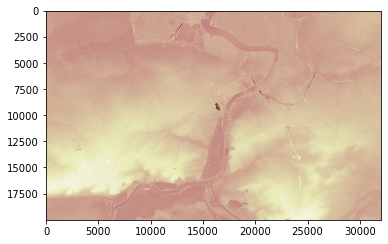

In [1]:
import rasterio
from matplotlib import pyplot
src = rasterio.open("data/DHMVIIDTMRAS1m_k15/GeoTIFF/DHMVIIDTMRAS1m_k15.tif")
pyplot.imshow(src.read(1), cmap='pink')
#<matplotlib.image.AxesImage object at 0x...>
pyplot.show()

In [22]:
""" position a slice on the map to reduce data """

' position a slice on the map to reduce data '

In [ ]:
""" make a function to search the right file """